In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

In [6]:
#getting the base  URL for API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#final URL for all the cities
city_list = []
# set up lists to hold reponse info
lat = []
lng =[]
humidity =[]
cloudiness =[]
country =[]
temp = []
windspeed =[]
date =[]
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
nb_tries = 10
for city in cities:
    final_url =f"{base_url}appid={weather_api_key}&q={city}"
    #requst API
    weather_data = requests.get(final_url)
    print(f'Processing Record {counter} | {city}')
    print(final_url)
    
    try:
        weather_data.raise_for_status()
        data = weather_data.json()
        #print(data) # to check the key structure
        time.sleep(1)
        city_list.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])      
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])    
        windspeed.append(data['wind']['speed'])
    except requests.exceptions.HTTPError as e:
        print('City not found. skipping...')
        print(str(e))
    except ConnectionError as err:
        if nb_tries == 0:
            raise err
        else:
            time.sleep(1)
    counter +=1
    nb_tries -= 1
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing Record 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=port alfred
Processing Record 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kapaa
Processing Record 3 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=saint george
Processing Record 4 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=barrow
Processing Record 5 | gangotri
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=gangotri
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=gangotri
Processing Record 6 | poltava
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=poltava
Processing Record 7 |

Processing Record 59 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=saint-philippe
Processing Record 60 | east london
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=east london
Processing Record 61 | general roca
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=general roca
Processing Record 62 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=puerto ayora
Processing Record 63 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=bengkulu
Processing Record 64 | cubuk
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=cubuk
Processing Record 65 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=longyearbyen
Processing Record 66 | bethel
http://api.openweathermap.org/d

Processing Record 117 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=iqaluit
Processing Record 118 | barentsburg
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=barentsburg
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=barentsburg
Processing Record 119 | altamont
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=altamont
Processing Record 120 | tahara
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=tahara
Processing Record 121 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=torbay
Processing Record 122 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=mar del plata
Processing Record 123 | lompoc
http://api.openwea

Processing Record 174 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=beringovskiy
Processing Record 175 | barinitas
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=barinitas
Processing Record 176 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=arraial do cabo
Processing Record 177 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kavieng
Processing Record 178 | churapcha
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=churapcha
Processing Record 179 | sambava
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=sambava
Processing Record 180 | ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=ulladulla
Processing Record 181 | atuona
http://api.openweathermap.org/data/

Processing Record 231 | manicore
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=manicore
Processing Record 232 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=dikson
Processing Record 233 | hirara
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=hirara
Processing Record 234 | batamshinskiy
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=batamshinskiy
Processing Record 235 | brownwood
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=brownwood
Processing Record 236 | mareeba
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=mareeba
Processing Record 237 | broome
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=broome
Processing Record 238 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=b

Processing Record 292 | samusu
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=samusu
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=samusu
Processing Record 293 | fuerte olimpo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=fuerte olimpo
Processing Record 294 | acarau
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=acarau
Processing Record 295 | karaton
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=karaton
Processing Record 296 | tynset
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=tynset
Processing Record 297 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=adrar
Processing Record 298 | fukue
http://api.openweathermap.org/data/2.5/w

Processing Record 349 | dongli
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=dongli
Processing Record 350 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=vardo
Processing Record 351 | kirchheim
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kirchheim
Processing Record 352 | zavetnoye
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=zavetnoye
Processing Record 353 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=comodoro rivadavia
Processing Record 354 | labuhan
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=labuhan
Processing Record 355 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=shingu
Processing Record 356 | noumea
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 407 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=dingle
Processing Record 408 | kenora
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kenora
Processing Record 409 | waipawa
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=waipawa
Processing Record 410 | huilong
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=huilong
Processing Record 411 | homer
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=homer
Processing Record 412 | youghal
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=youghal
Processing Record 413 | seymchan
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=seymchan
Processing Record 414 | trelew
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420e

Processing Record 463 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=turukhansk
Processing Record 464 | morondava
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=morondava
Processing Record 465 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=hasaki
Processing Record 466 | bouza
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=bouza
Processing Record 467 | haibowan
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=haibowan
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=haibowan
Processing Record 468 | waingapu
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=waingapu
Processing Record 469 | ankazoabo
http://api.openweathermap.or

Processing Record 522 | luwuk
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=luwuk
Processing Record 523 | barra patuca
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=barra patuca
Processing Record 524 | muswellbrook
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=muswellbrook
Processing Record 525 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=marawi
Processing Record 526 | kasamwa
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kasamwa
Processing Record 527 | gimli
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=gimli
Processing Record 528 | puteyets
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=puteyets
Processing Record 529 | xining
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88

Processing Record 583 | kalomo
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kalomo
City not found. skipping...
404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=kalomo
Processing Record 584 | neyshabur
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=neyshabur
Processing Record 585 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=yumen
Processing Record 586 | barahona
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=barahona
Processing Record 587 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=srednekolymsk
Processing Record 588 | bria
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=bria
Processing Record 589 | huarmey
http://api.openweathermap.org/data

Processing Record 645 | khorixas
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=khorixas
Processing Record 646 | santarem
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=santarem
Processing Record 647 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=ixtapa
Processing Record 648 | amazar
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=amazar
Processing Record 649 | gulabpura
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=gulabpura
Processing Record 650 | la ronge
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=la ronge
Processing Record 651 | washington
http://api.openweathermap.org/data/2.5/weather?appid=bc922c88821b1d0fa43a86420ee90cc3&q=washington
---------------------
Data Retrieval Complete


## Convert Raw Data to DataFrame
. Export the city data into a .csv

. Display the DataFrame

In [7]:
#create dataframe for the json response 
weather_df = pd.DataFrame({'City':city_list,'Latitude':lat,'Longitude':lng,'Wind Speed':windspeed
                           ,'Humidity':humidity,'Max Temp':temp,'Cloudiness':cloudiness,'Date':date,'Country':country})
#convert max temp to fahrenheit
weather_df['Max Temp'] = ((weather_df['Max Temp'] -273.15)*1.8+32)
#print the dataframe to check 
weather_df.head(10)

,City,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date,Country
0,port alfred,-33.5906,26.8910,9.95,51,71.006,89,1627819144,ZA
1,kapaa,22.0752,-159.3190,1.34,81,77.108,46,1627819145,US
2,saint george,37.1041,-113.5841,2.68,62,78.350,30,1627819146,US
3,barrow,71.2906,-156.7887,6.57,84,45.680,68,1627819147,US
4,poltava,49.5937,34.5407,3.50,26,92.048,33,1627819148,UA
5,albany,42.6001,-73.9662,0.45,82,63.032,32,1627819150,US
6,parrita,9.5201,-84.3225,1.59,84,83.984,68,1627819151,CR
7,bluff,-46.6000,168.3333,3.10,93,40.802,30,1627819152,NZ
8,esperance,-33.8667,121.9000,12.44,70,44.438,91,1627819153,AU
9,rikitea,-23.1203,-134.9692,11.28,69,69.422,95,1627819154,PF


In [8]:
#output the dataframe to a csvfile 
weather_df.to_csv('output.csv')

In [9]:
#check the size of dataframe
len(weather_df)


604

In [10]:
# find the statistical data on weather_df
summary = weather_df.agg(['count','mean','std','min','max'])
summary =summary.drop(columns=['City','Country'])
#add quartiles
quart = weather_df[['Longitude','Latitude','Wind Speed','Humidity','Max Temp','Cloudiness','Date']].quantile([.25,.5,.75])
quart

,Longitude,Latitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date
0.25,-56.10330,-6.22855,1.7900,54.0,62.177,20.0,1.627819e+09
0.50,24.69905,22.18035,3.1450,72.0,72.995,64.0,1.627819e+09
0.75,104.29990,48.06060,4.9175,87.0,80.636,93.0,1.627820e+09


In [11]:
#display the final summary table
summary.append(quart,ignore_index= False)

,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000,6.040000e+02
min,-54.800000,-175.200000,0.000000,1.000000,28.292000,0.000000,1.627819e+09
max,78.218600,179.316700,14.920000,100.000000,111.344000,100.000000,1.627820e+09
mean,19.604536,23.602905,3.620861,67.572848,70.909623,55.360927,1.627819e+09
std,33.064392,89.954741,2.434099,23.279319,15.050128,37.371634,2.191735e+02
0.25,-6.228550,-56.103300,1.790000,54.000000,62.177000,20.000000,1.627819e+09
0.5,22.180350,24.699050,3.145000,72.000000,72.995000,64.000000,1.627819e+09
0.75,48.060600,104.299900,4.917500,87.000000,80.636000,93.000000,1.627820e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [12]:
humid = weather_df.loc[(weather_df['Humidity'] > 100)]
if humid['Humidity'].count() == 0:
   print(" No city found")

 No city found


## Plotting the Data
-----------------------------



### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


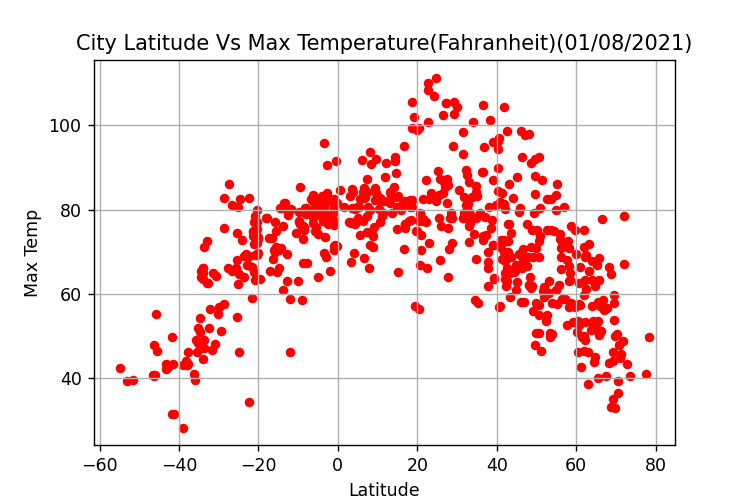

In [45]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Max Temp',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Max Temperature(Fahranheit)(01/08/2021)")
#save plot
plt.savefig('tempplot.png')


### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


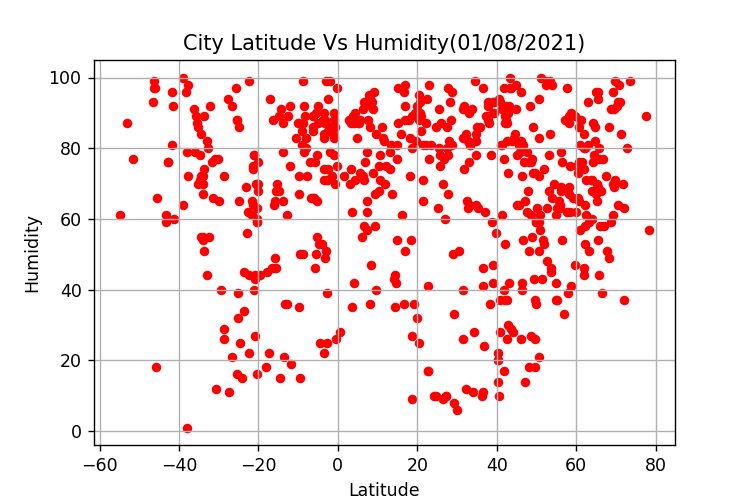

In [44]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Humidity',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity(01/08/2021)")
plt.savefig('humidplot.png')

### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


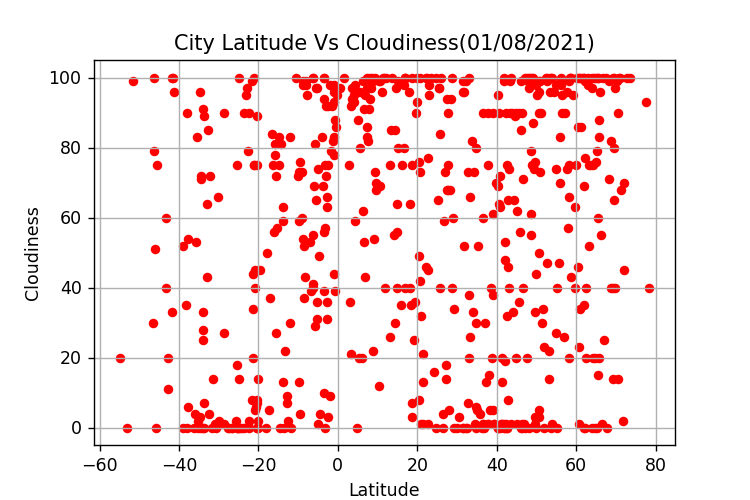

In [42]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Cloudiness',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Cloudiness(01/08/2021)")
plt.savefig('cloudplot')

### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


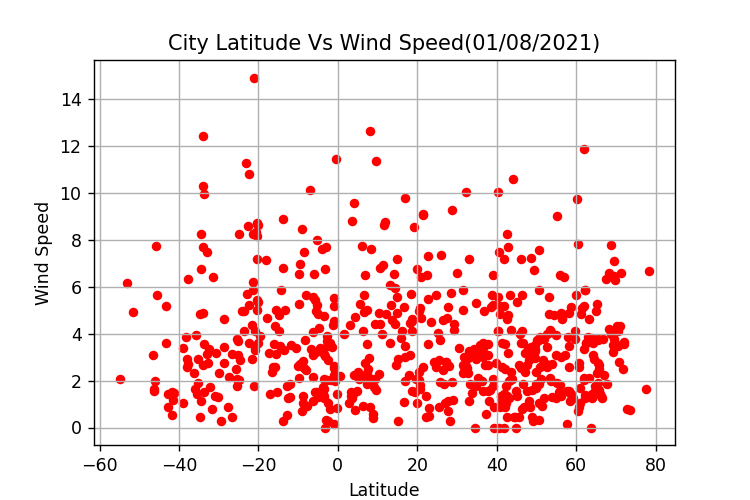

In [43]:
weather_df.plot(kind = 'scatter',x = 'Latitude', y ='Wind Speed',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Wind Speed(01/08/2021)")
plt.savefig('windspeed.png')

## Linear Regression for Northeren and Southern Hemisphere

In [20]:
# dataframe for northern hemisphere 
north_df = weather_df.loc[weather_df['Latitude'] > 0]
#diplay the df head()
north_df.head()

,City,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date,Country
1,kapaa,22.0752,-159.3190,1.34,81,77.108,46,1627819145,US
2,saint george,37.1041,-113.5841,2.68,62,78.350,30,1627819146,US
3,barrow,71.2906,-156.7887,6.57,84,45.680,68,1627819147,US
4,poltava,49.5937,34.5407,3.50,26,92.048,33,1627819148,UA
5,albany,42.6001,-73.9662,0.45,82,63.032,32,1627819150,US


In [21]:
# dataframe for southern hemisphere 
south_df = weather_df.loc[weather_df['Latitude'] < 0]
#diplay the df head()
south_df.head()

,City,Latitude,Longitude,Wind Speed,Humidity,Max Temp,Cloudiness,Date,Country
0,port alfred,-33.5906,26.8910,9.95,51,71.006,89,1627819144,ZA
7,bluff,-46.6000,168.3333,3.10,93,40.802,30,1627819152,NZ
8,esperance,-33.8667,121.9000,12.44,70,44.438,91,1627819153,AU
9,rikitea,-23.1203,-134.9692,11.28,69,69.422,95,1627819154,PF
10,ancud,-41.8697,-73.8203,1.53,81,31.532,33,1627819155,CL


#### Northern Hemisphere -Humidity vs. Latitude Linear Regression

The value of r is -0.02


<IPython.core.display.Javascript object>


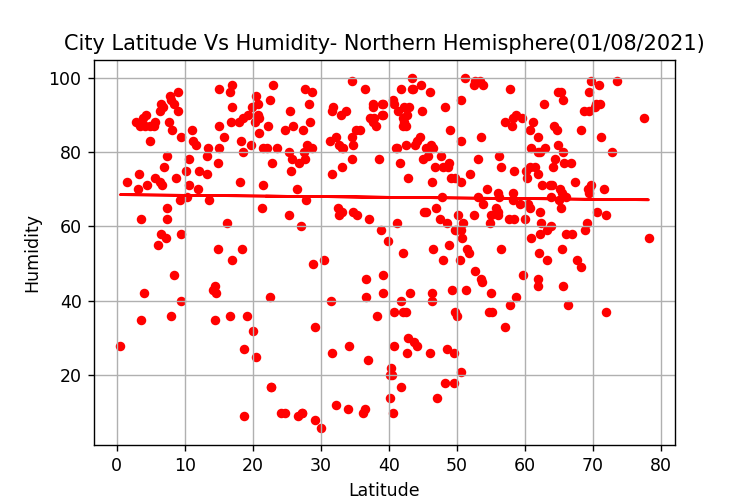

Text(0.5, 1.0, 'City Latitude Vs Humidity- Northern Hemisphere(01/08/2021)')

In [46]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Humidity'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Humidity',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Northern Hemisphere(01/08/2021)")


In [47]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Humidity'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')
plt.savefig('northhumid.png')

 #### Southern Hemisphere -Humidity vs. Latitude Linear Regression

The value of r is 0.03


<IPython.core.display.Javascript object>


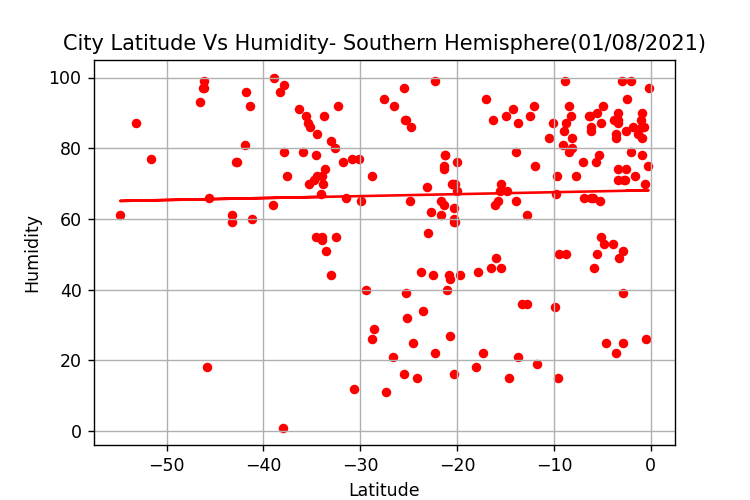

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)')

In [48]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Humidity'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Humidity',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)")


In [49]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Humidity'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')
plt.savefig('southhumid.png')

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r is -0.62


<IPython.core.display.Javascript object>


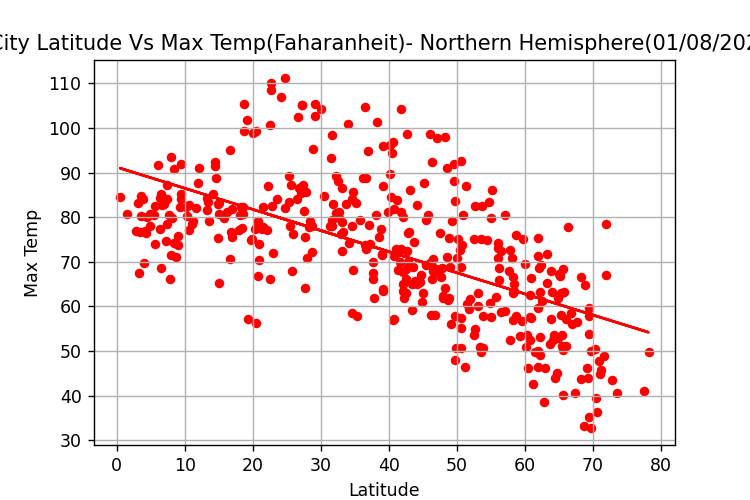

Text(0.5, 1.0, 'City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere(01/08/2021)')

In [50]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Max Temp'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Max Temp',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere(01/08/2021)")

In [51]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Max Temp'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')
plt.savefig('northtemp.png')

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression



The value of r is 0.8


<IPython.core.display.Javascript object>


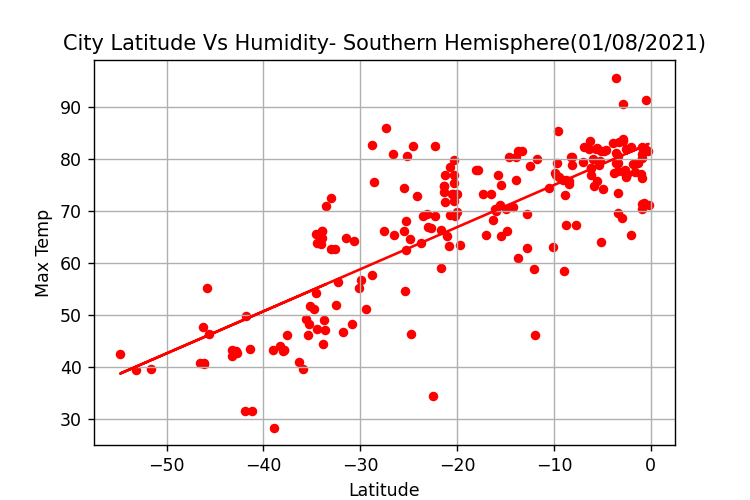

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)')

In [52]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Max Temp'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Max Temp',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)")


In [53]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Max Temp'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')
plt.savefig('southtemp.png')

#### Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

The value of r is -0.04


<IPython.core.display.Javascript object>


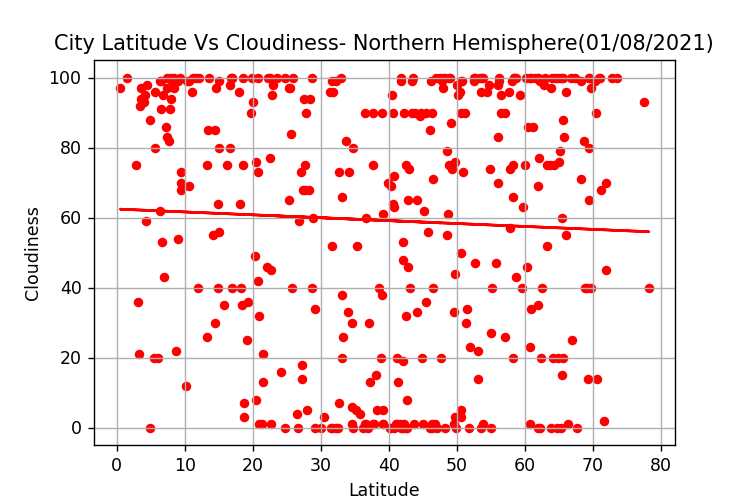

Text(0.5, 1.0, 'City Latitude Vs Cloudiness- Northern Hemisphere(01/08/2021)')

In [54]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Cloudiness'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Cloudiness',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Cloudiness- Northern Hemisphere(01/08/2021)")


In [55]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Cloudiness'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')
plt.savefig('northcloud.png')

#### Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

The value of r is 0.27


<IPython.core.display.Javascript object>


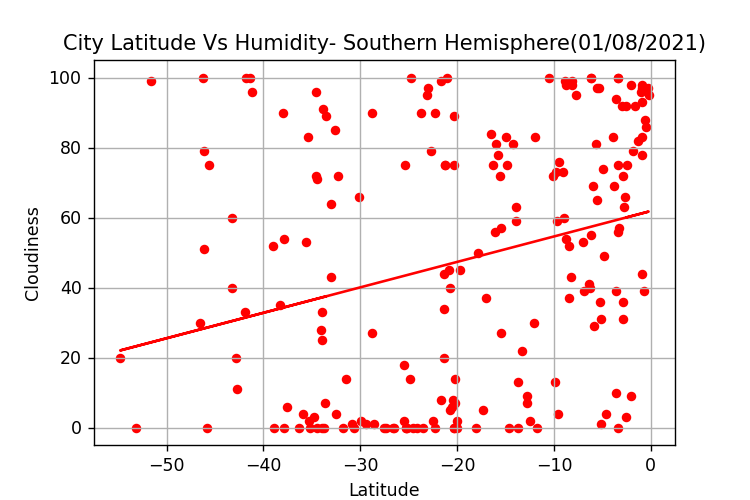

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)')

In [56]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Cloudiness'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Cloudiness',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)")


In [57]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Cloudiness'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')
plt.savefig('southcloud.png')

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r is -0.09


<IPython.core.display.Javascript object>


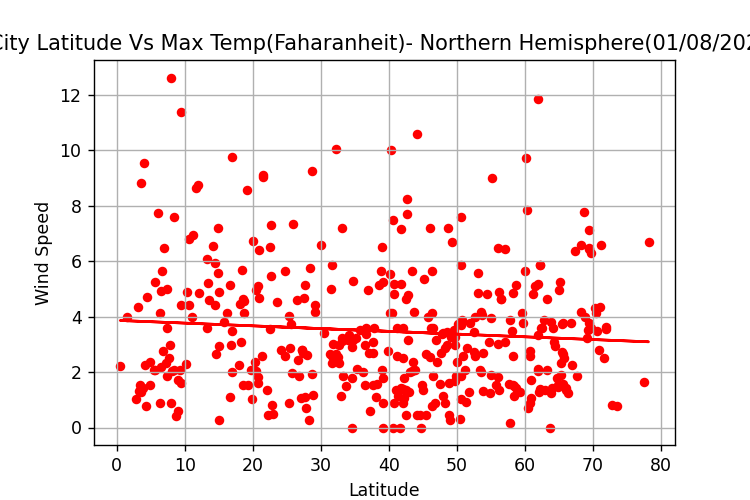

Text(0.5, 1.0, 'City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere(01/08/2021)')

In [58]:
#define x-axis for further calculations
x_axis = north_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_axis,north_df['Wind Speed'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
north_df.plot(kind = 'scatter',x = 'Latitude', y ='Wind Speed',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Max Temp(Faharanheit)- Northern Hemisphere(01/08/2021)")

In [59]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_axis,north_df['Wind Speed'])
humid_fit = humid_slope*x_axis + humid_int
#plot the linear regression
plt.plot(x_axis,humid_fit,color='Red')
plt.savefig('northwind.png')

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r is -0.03


<IPython.core.display.Javascript object>


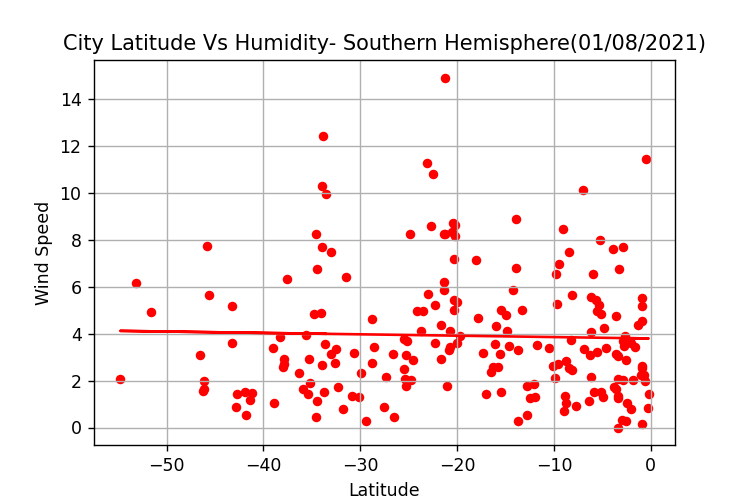

Text(0.5, 1.0, 'City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)')

In [60]:
#define x-axis for further calculations
x_south = south_df['Latitude']
#correlation coeffecient
corr, _ = stats.pearsonr(x_south,south_df['Wind Speed'])
print(f"The value of r is {round(corr, 2)}")

#scatter plot 
south_df.plot(kind = 'scatter',x = 'Latitude', y ='Wind Speed',figsize=(6,4),color ="Red",grid = True)
plt.title("City Latitude Vs Humidity- Southern Hemisphere(01/08/2021)")


In [61]:
#linear regression
humid_slope,humid_int,humid_r,humid_p,humid_std_err = stats.linregress (x_south,south_df['Wind Speed'])
humid_fit = humid_slope*x_south + humid_int
#plot the linear regression
plt.plot(x_south,humid_fit,color='Red')
plt.savefig('southwind.png')